<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/life/evaluate_engineering_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disclaimer

* Content of this notebook is for my personal learning. 
* I currently use a repository of Python notebooks as my knowledge management system, it is like some people use note taking apps with the added benefit of interactivity and ability to programatically play with the concepts, ideas and data in order to deepen the understanding and strengthen recall.  
* Any opinions or ideas expressed here are on my own behalf and do not represent my employer.
* Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.
* Content starts from the section [Header](#cell-header).


## Code Set Up

In [ ]:
#@title Imports {display-mode: "form"}
import sys
import os
import platform
import random
import itertools
import math
import datetime

import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# reading google sheets files
import gspread
from oauth2client.client import GoogleCredentials

from collections import OrderedDict

# print versions
print (f"system: {sys.version}")
print (f"pandas: {pd.__version__}")
print (f"numpy: {np.__version__}")

system: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
pandas: 1.1.5
numpy: 1.19.5


In [ ]:
# @title Dislay settings  {display-mode: "form"} 
sns.set(context='notebook', style="whitegrid", rc={"figure.figsize": (20, 10)})
pd.set_option("display.float_format", '{:.3f}'.format)
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", 200)

### Helper functions and snippets

Note: This notebook is created from the template `knowledge_notebook_template.ipynb`. For convenience it inherits all potentially useful imports, helper utils and general structure. That means it is likely not using all the defined functionality.

In [ ]:
# @title Using R  {display-mode: "form"} 
# loading in case want to write R code
%load_ext rpy2.ipython
# example R code

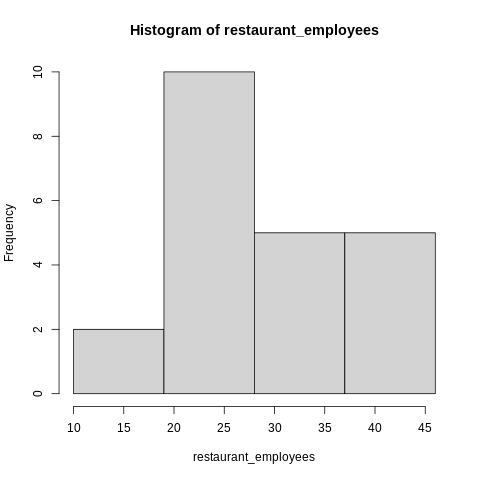

In [ ]:
%%R
restaurant_employees <- c(22, 35, 15, 26, 40, 28, 18, 20, 25, 34, 39, 42, 24, 22, 19, 27, 22, 34, 40, 20, 38, 28)
hist(restaurant_employees, breaks=c(10,19,28,37,46), right=FALSE)

#### Loading data from gsheet

In [ ]:
# @title Google Authentication {display-mode: "form"}
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# @title {display-mode: "form"} 
# importing data from google sheet
def get_data_gsheet(name='data_jobs_summary'):
  gc = gspread.authorize(GoogleCredentials.get_application_default())
  worksheet = gc.open(name).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  header = rows[0]
  df_data = pd.DataFrame.from_records(data=rows[1:], columns=header)
  return df_data

# df = get_data_gsheet()

In [ ]:
# @title {display-mode: "form"} 
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

#### Plotting for math

In [ ]:
# @title {display-mode: "form"} 
def create_spine_plane(ax, title='title'):
  """
  adds cartesian plane 
  to the background of the plot
  """
  ax.set_title(title)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  return ax

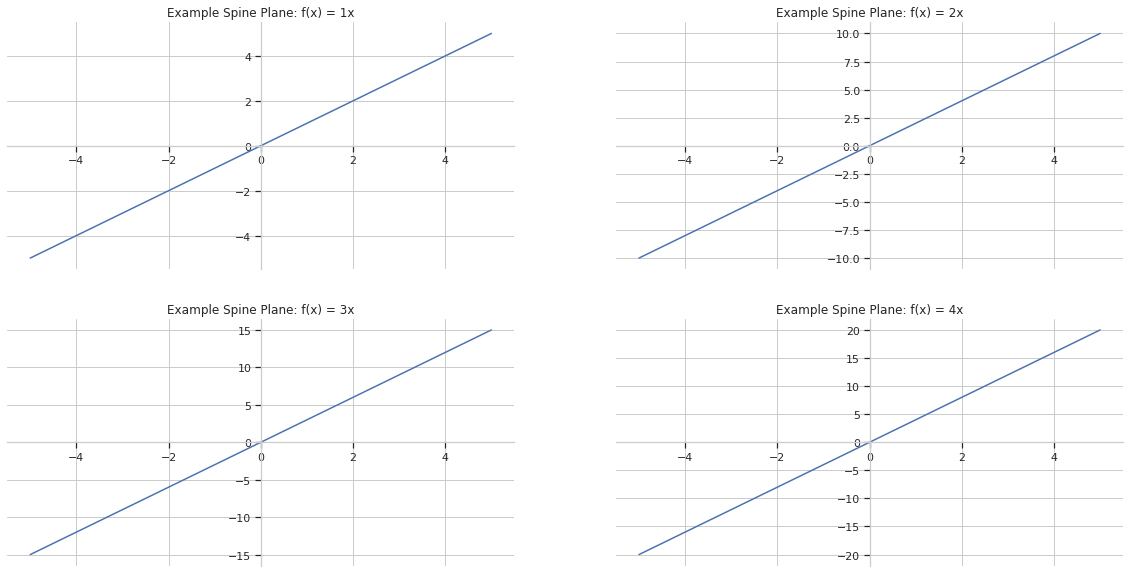

In [ ]:
# @title {display-mode: "form"} 
# showing demo function on a plane
fig = plt.figure()

# define grid here
subplot_grid_x = 2
subplot_grid_y = 2

x = [x for x in np.arange(-5,6)]

for i in range(4):
  # function definition
  y = [(i+1) * xi for xi in x]
  ax = fig.add_subplot(subplot_grid_x, subplot_grid_y, i+1)
  ax = create_spine_plane(ax, title=f"Example Spine Plane: f(x) = {i+1}x");
  ax.plot(x, y);

In [ ]:
# @title {display-mode: "form"} 
def plot_shapes():
  """
  plot example shapes - circle and lines
  """
  plt.axes()
  circle = plt.Circle((0,0),1, facecolor='None',edgecolor='blue')
  plt.gca().add_patch(circle)
  line1 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')
  line2 = plt.Line2D((0, 1), (0, 0), linewidth=1.5, linestyle='--', color = 'black')

  plt.gca().add_line(line1)
  plt.axis('scaled')
  return plt


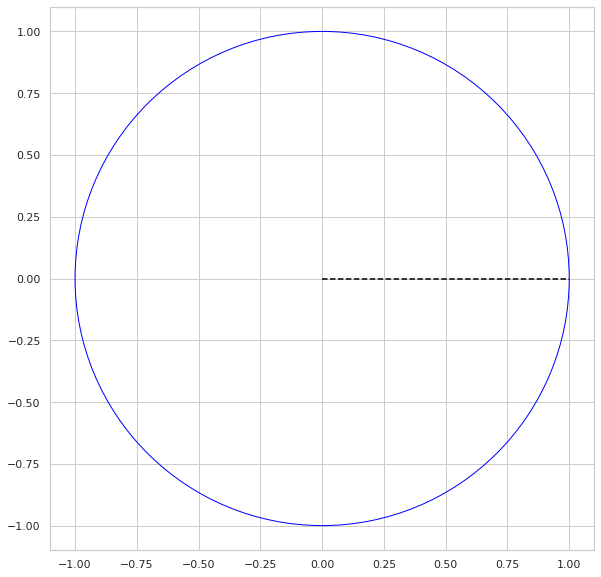

In [ ]:
plot_shapes();

### Handy Links

[Altair guide](https://altair-viz.github.io/getting_started/overview.html#)

<a name="cell-header"></a>
# Header: Title and metadata

In [ ]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for ='Evaluating studying engineering.'
title = 'Evaluate engineering study.'
description = 'Notebook summarizing information about pursuing engineering education.'
tags = ['#principles', '#data-driven', '#engineering', '#datascience']
generate_header(author=author, title=title, description=description, prepared_for=prepared_for, tags=tags)

,meta_information
author,Michal Szczecinski
title,Evaluate engineering study.
description,Notebook summarizing information about pursuing engineering education.
prepared_for,Evaluating studying engineering.
tags,"['#principles', '#data-driven', '#engineering', '#datascience']"
runtime,2021-04-13 17:45:54
path,/content
python_version,3.7.10
pandas_version,1.1.5


## Context

## Configuration

##  Objectives


1. Develop stronger and more complete foundations
  1. Complement my education in IT & Econometrics
  1. Refresh knowledge and fill any gaps in Mathematics
  1. Sharpen problem solving

1. Attain tangible hands-on engineering skills and respected qualification

1. Future proof data science skills by combining technology skills across AI, Mechatronics, IOT and Statistics.


### Motivation

1. Self actuization
1. Enhancing my technical knowledge and skills to become better data scientist
1. Developing tangible hands on skillset
1. Have better tools to understand and explain world around us
1. Participate and contribute to AI, IOT and robotization trends of future


### Why it is good for work?


1. Refresh and sharpen Math And Problem Skills which would be directly applicable at work and also allow to make more advanced contributions
1. Complement my background and education through developing skills from engineering perspective. This way I would have strong training in Business/Economics/ Statistics/Econometrics PLUS Engineering. 
1. Deeeper understanding of computer systems and modern technology.
1. Strong application and relevance to multiple areas across Google (AI/Robotics/Devices/Software Engineering/Networking and so on)
1. I believe more of our work and collaborations will require skills on intersection of data science and engineering
1. It looks likely that future world would have dramatically increased adoption of AI, data connectivity and smart electro-mechanical systems in daily lives. This should make data scientists with engineering background very valuable to society.

# Options Comparison

## NTU 

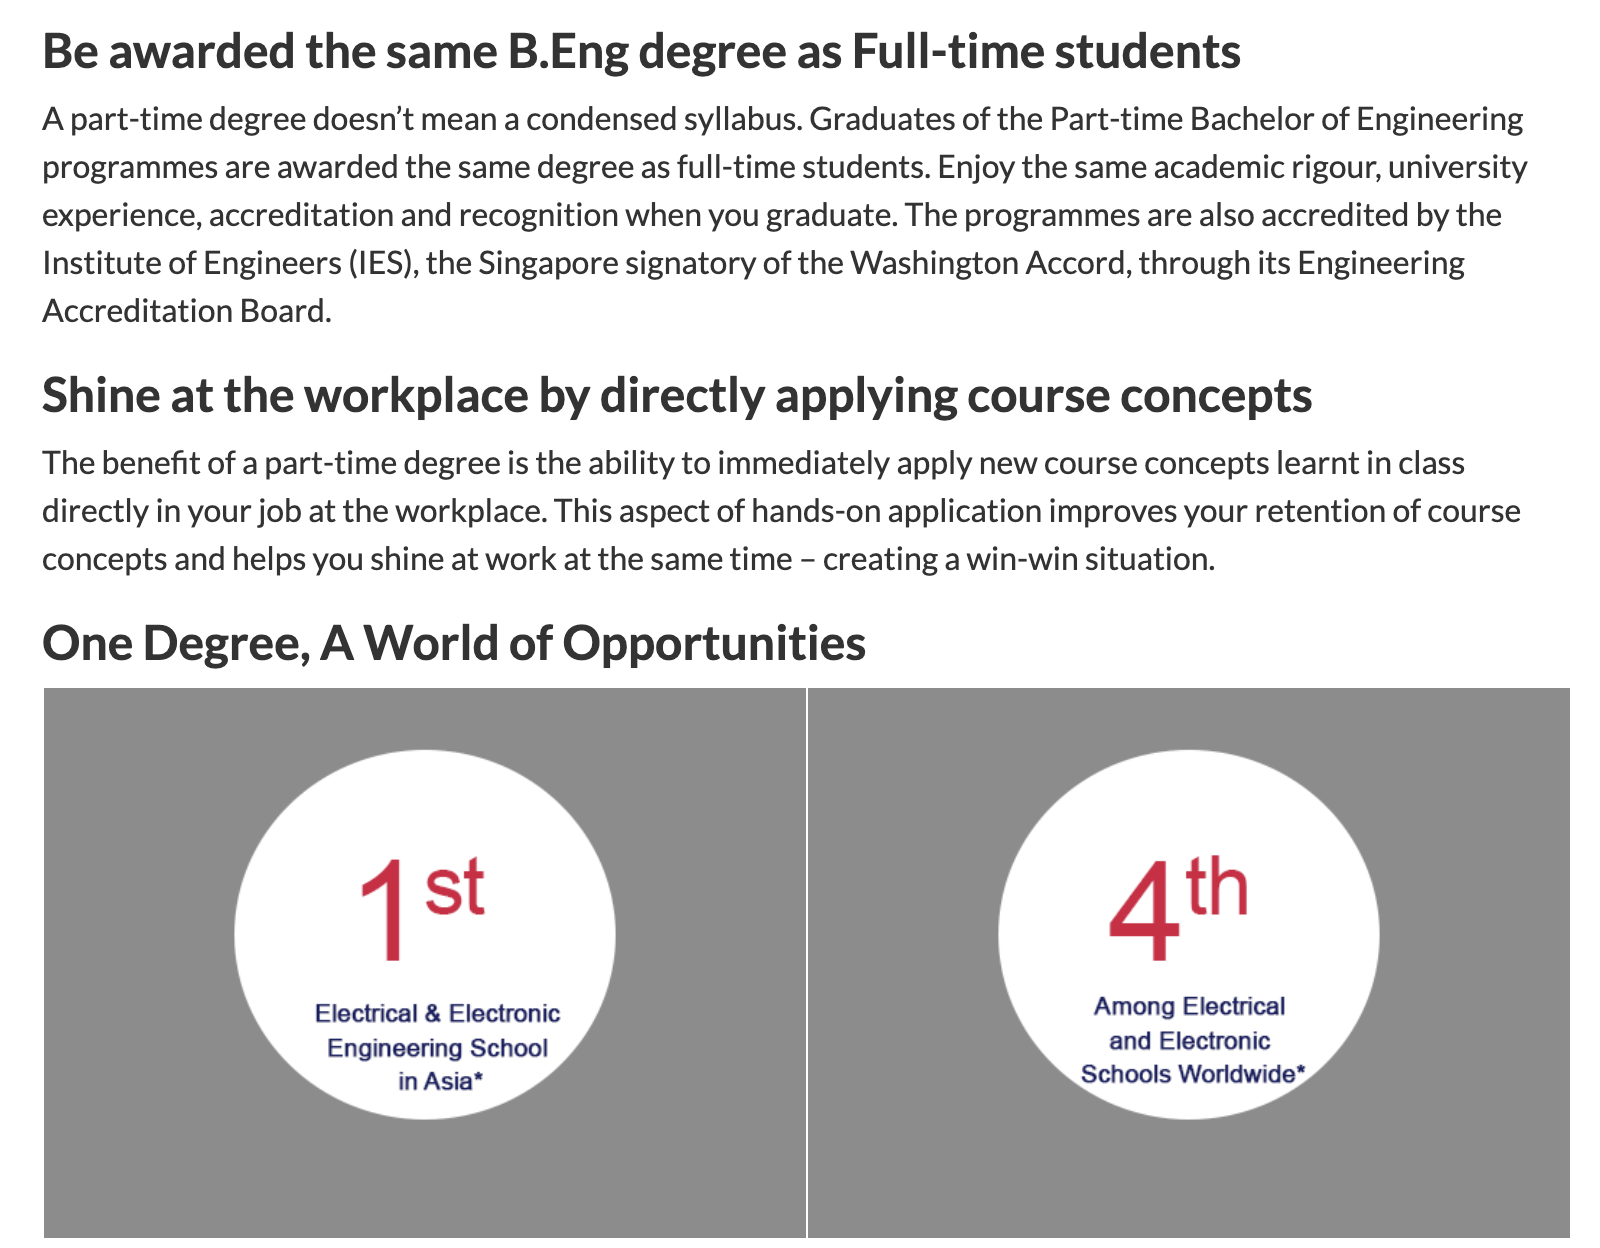

### Curriculum

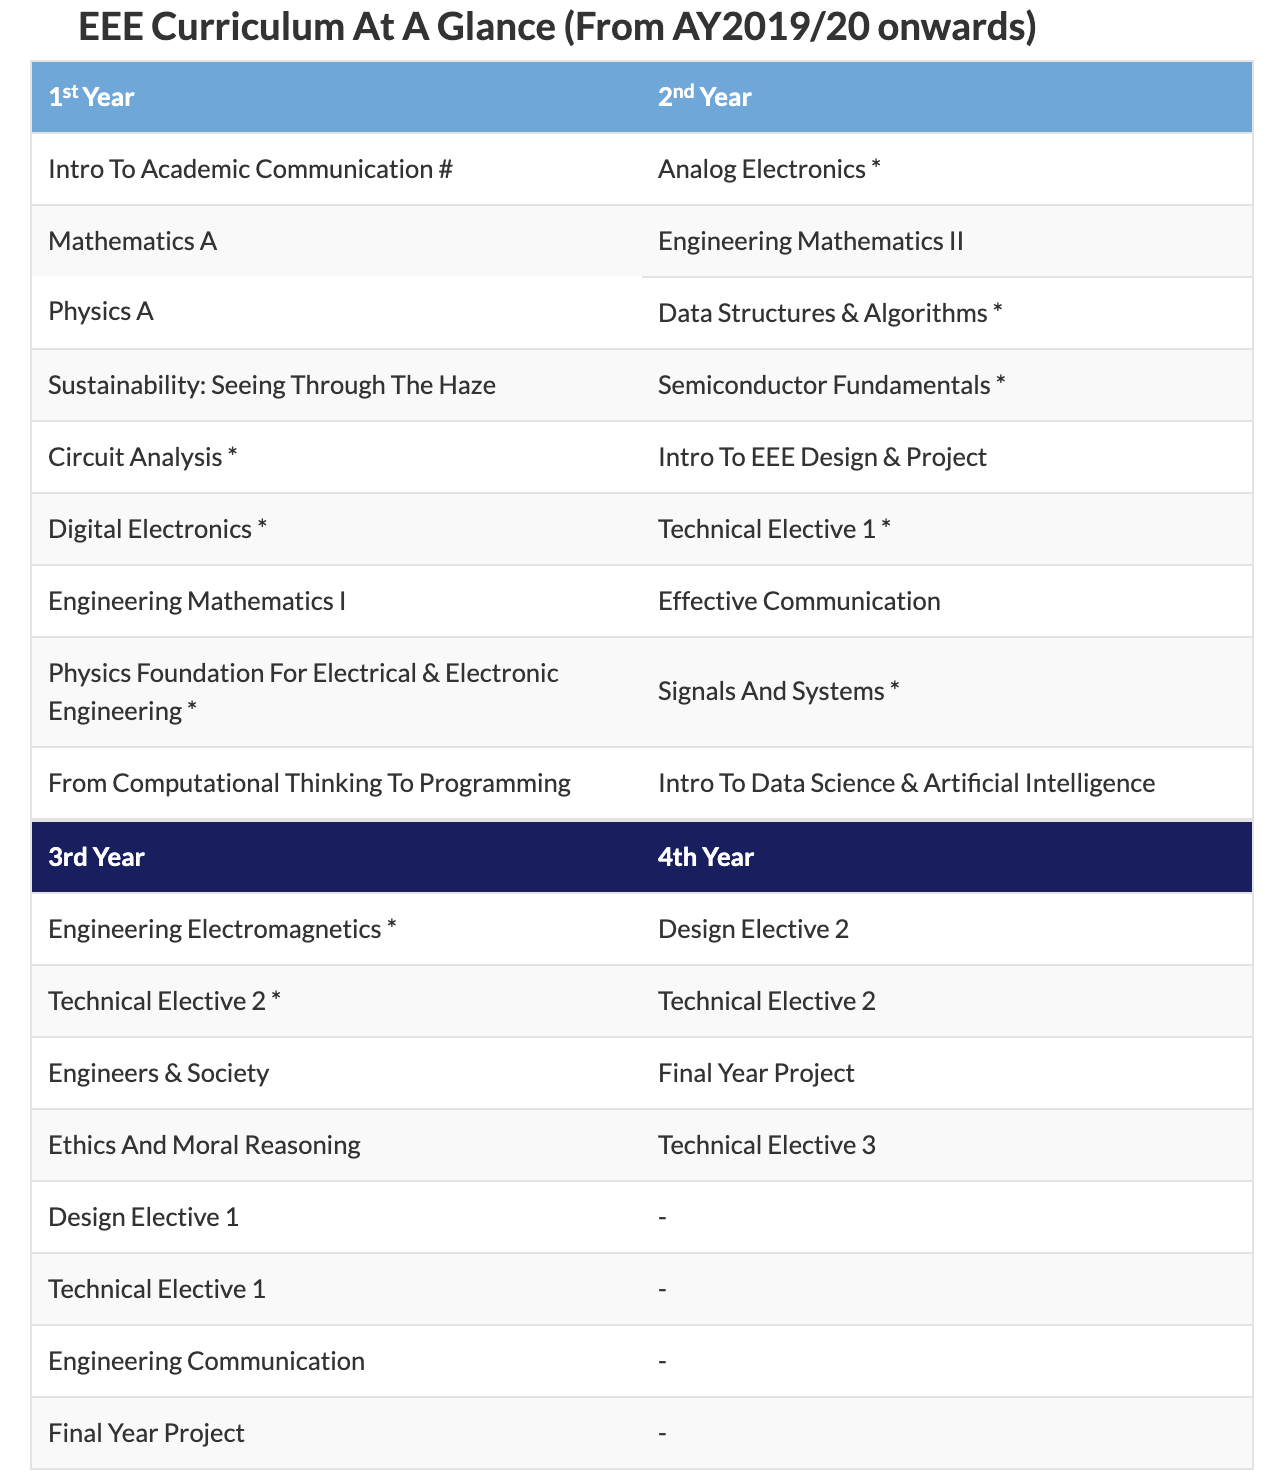

### Pros


- very prestigious, highly ranked (4th in the world) qualification
- relevant and future proof curriculum
- refreshing and further improving fundamentals  (Math, Problem Solving, Engineering craftmanship, AI)
- opening opportunity to do Phd in future and 
- AI , Math ,Physics, Data Science , Programming  subjects
- good timing to do it now
- will motivate me to refresh my technical and problem solving skills which will make me a better data scientist and allow to contribute more to my work at Google
- great campus
- great and opened academic personel
- best students in SG
- challenging fast pace environment cultivating having super strong dyscipline, time management and work ethic


### Cons

- will be challenging doing this while working full time
- fast pace learning
- more expensive 
- 4 years
- far (relativelly for Singapore)


### Cost

15,700 SGD * 4 ? (according to google head result)

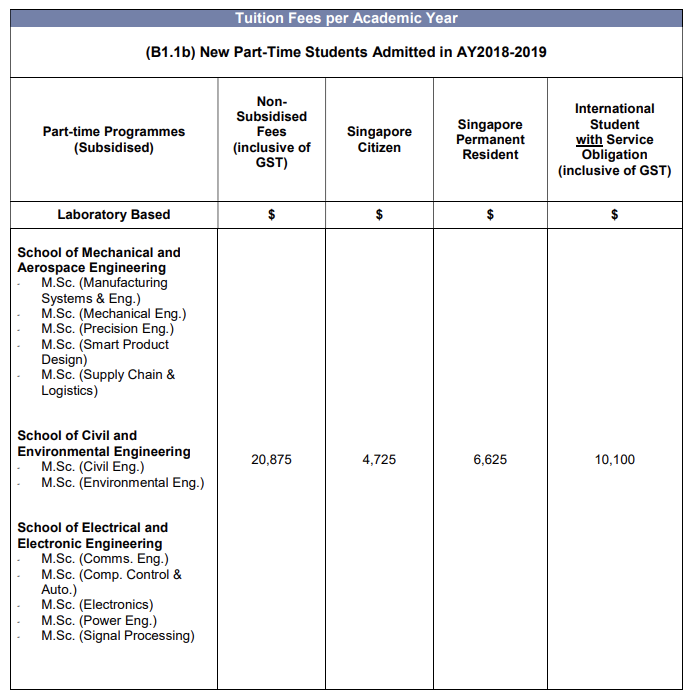

https://www3.ntu.edu.sg/oad2/GA_CW/AY2018-2019CourseworkFees_MOE.pdf

## Ngee Ann Mechatronics

### Learning outcomes


- Gain insights, flexibility, and adaptability to forward your career with skills to design and create smart products and systems. 
- Apply concepts and techniques of automation and control technologies and be equipped for automation and process industries.
- You will acquire the basic concepts of designing electrical and electronic circuits, and build application projects based on knowledge learnt.
- You will also gain knowledge in mechanical system design, analysis and production of CAD drawings.

### Curriculum

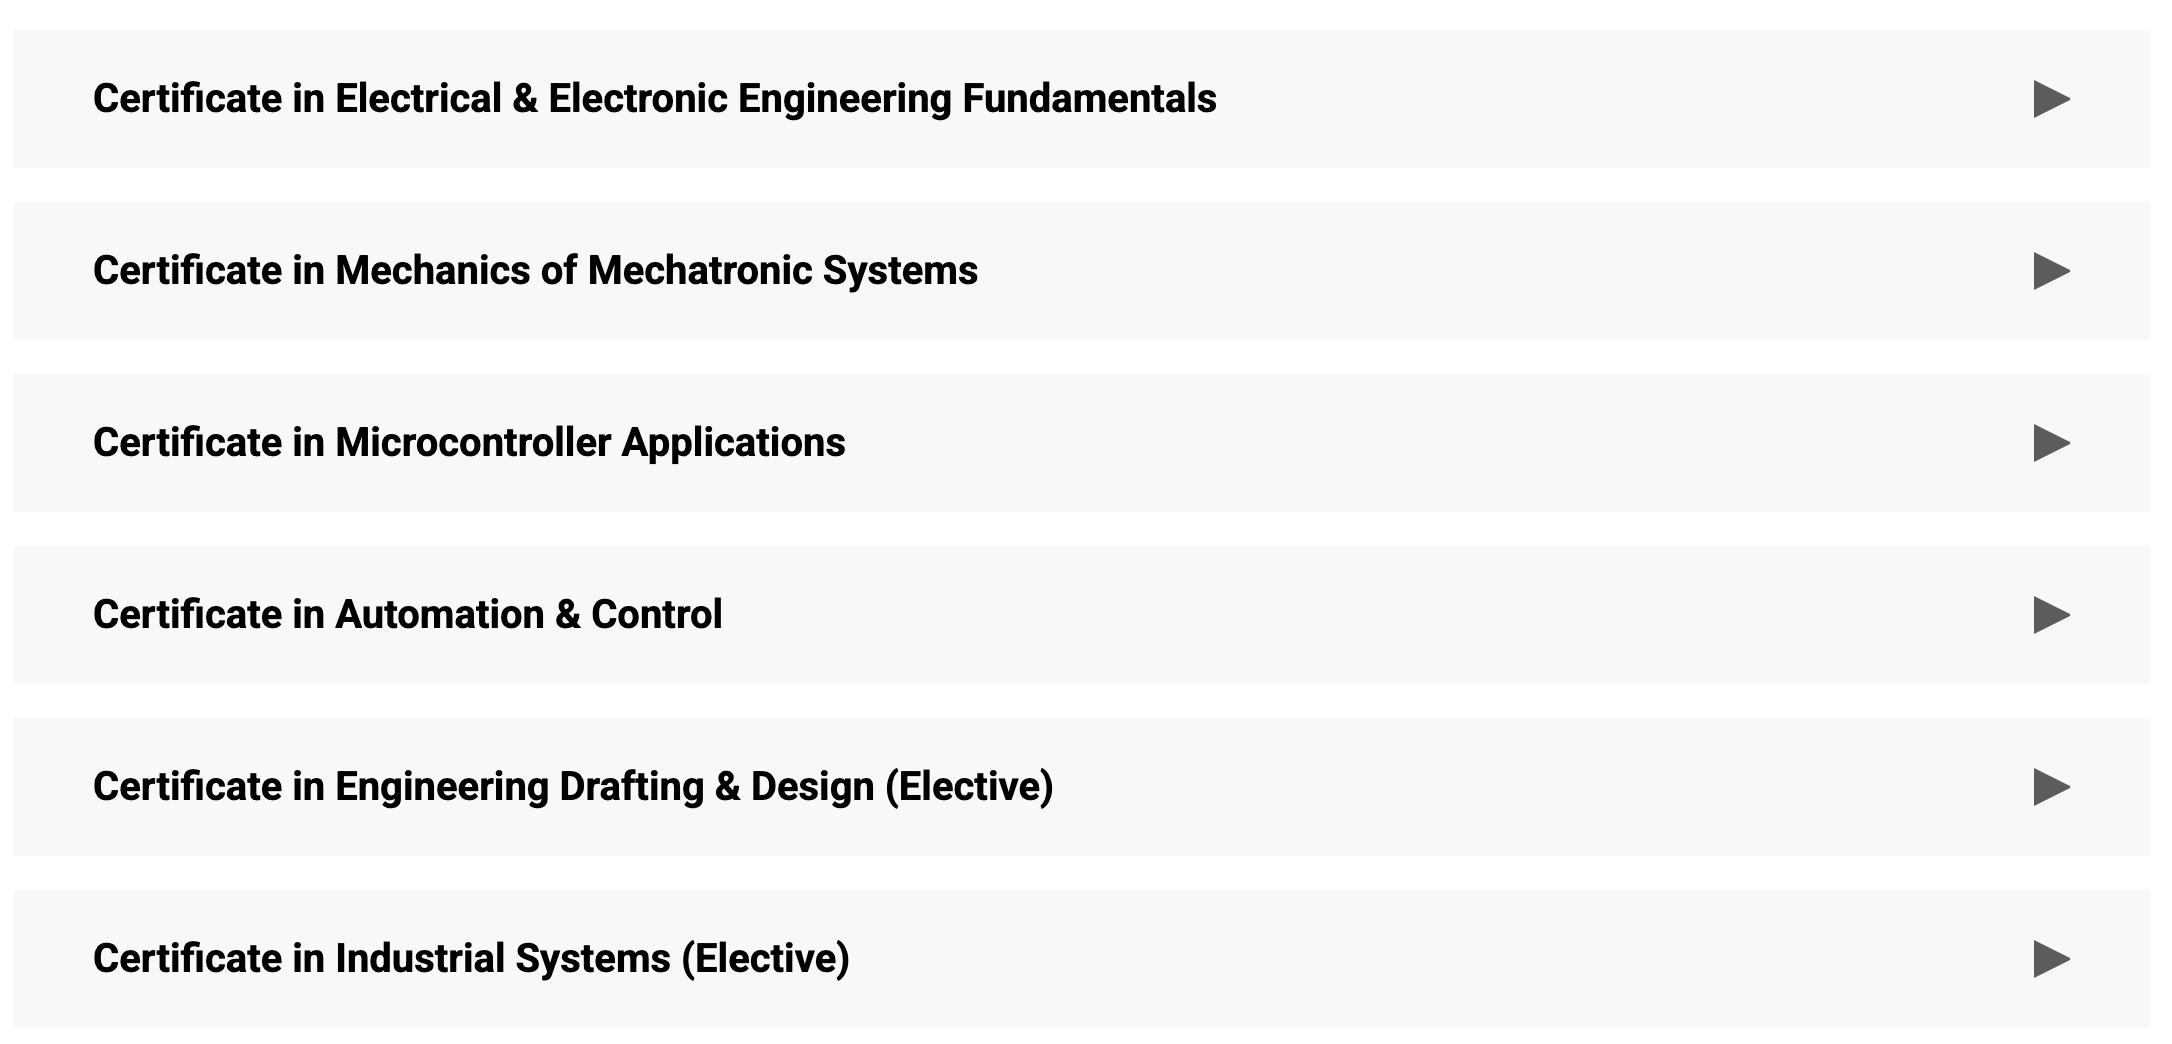

### Pros

- hands on practical experience
- exciting curriculum
- building faster and more first before getting deeper into theory
- direct mechatronics qualification
- less challenging than NTU and more approachable pace
- closer to home

### Cons

- no degree just diploma
- less prestigious than NTU
- less fundamental Mathematics and Physics


### Cost

3000 SGD * 6 = 18000 SGD

## Other options

- masters or PhD directly through transition program or cross disciplinary collaboration
- self study at home
- Stanford online courses and certifications

## References

[Singapore Education Cost - Money Smart](https://blog.moneysmart.sg/education/singapore-university-education-cost/)

[NTU Bachelor of Engineering Degree Program](https://www.ntu.edu.sg/pace/programmes/part-time-bachelor-of-engineering-degree-programmes/bachelor-of-engineering-(electrical-and-electronic-engineering)---part-time#Content_C033_Col00)